In [17]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [18]:
from io import StringIO
import requests

#url = 'http://www.analytixlabs.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv'
#s = requests.get(url).text

#sales_data = pd.read_csv(StringIO(s))
shampoo_data = pd.read_csv("D:\\Data_Science\\Week3-Day5 Harsh\\Week3-Assessment\\Shampo Sales Forecasting\\shampoo-sales.csv",sep=',')
shampoo_data.head(5)

,Month,sales
0,01-Jan,266.0
1,01-Feb,145.9
2,01-Mar,183.1
3,01-Apr,119.3
4,01-May,180.3


In [19]:
shampoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
sales    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [20]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2014-01-01', freq='MS', periods=len(shampoo_data))

In [21]:
dates

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [22]:
import calendar
shampoo_data['Mon'] = dates.month
shampoo_data['Mon'] = shampoo_data['Mon'].apply(lambda x: calendar.month_abbr[x])
shampoo_data['Year'] = dates.year

In [23]:
shampoo_data.head()

,Month,sales,Mon,Year
0,01-Jan,266.0,Jan,2014
1,01-Feb,145.9,Feb,2014
2,01-Mar,183.1,Mar,2014
3,01-Apr,119.3,Apr,2014
4,01-May,180.3,May,2014


In [27]:
#shampoo_data.drop(['Month'], axis=1, inplace=True)
#shampoo_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
shampoo_data = shampoo_data[['Mon', 'Year', 'sales']]

In [28]:
shampoo_data.head()

,Mon,Year,sales
0,Jan,2014,266.0
1,Feb,2014,145.9
2,Mar,2014,183.1
3,Apr,2014,119.3
4,May,2014,180.3


In [30]:
shampoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
Mon      36 non-null object
Year     36 non-null int64
sales    36 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 944.0+ bytes


In [31]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
shampoo_data.set_index(dates, inplace=True)

In [32]:
# check out first 5 samples of the data
shampoo_data.head(5)

,Mon,Year,sales
2014-01-01,Jan,2014,266.0
2014-02-01,Feb,2014,145.9
2014-03-01,Mar,2014,183.1
2014-04-01,Apr,2014,119.3
2014-05-01,May,2014,180.3


In [33]:
shampoo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2014-01-01 to 2016-12-01
Freq: MS
Data columns (total 3 columns):
Mon      36 non-null object
Year     36 non-null int64
sales    36 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [34]:
# extract out the time-series
shampoo_ts = shampoo_data['sales']

In [35]:
shampoo_ts

2014-01-01    266.0
2014-02-01    145.9
2014-03-01    183.1
2014-04-01    119.3
2014-05-01    180.3
2014-06-01    168.5
2014-07-01    231.8
2014-08-01    224.5
2014-09-01    192.8
2014-10-01    122.9
2014-11-01    336.5
2014-12-01    185.9
2015-01-01    194.3
2015-02-01    149.5
2015-03-01    210.1
2015-04-01    273.3
2015-05-01    191.4
2015-06-01    287.0
2015-07-01    226.0
2015-08-01    303.6
2015-09-01    289.9
2015-10-01    421.6
2015-11-01    264.5
2015-12-01    342.3
2016-01-01    339.7
2016-02-01    440.4
2016-03-01    315.9
2016-04-01    439.3
2016-05-01    401.3
2016-06-01    437.4
2016-07-01    575.5
2016-08-01    407.6
2016-09-01    682.0
2016-10-01    475.3
2016-11-01    581.3
2016-12-01    646.9
Freq: MS, Name: sales, dtype: float64

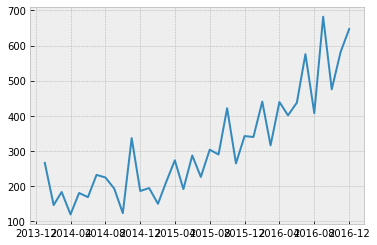

In [36]:
plt.plot(shampoo_ts)

Text(0,0.5,'sales')

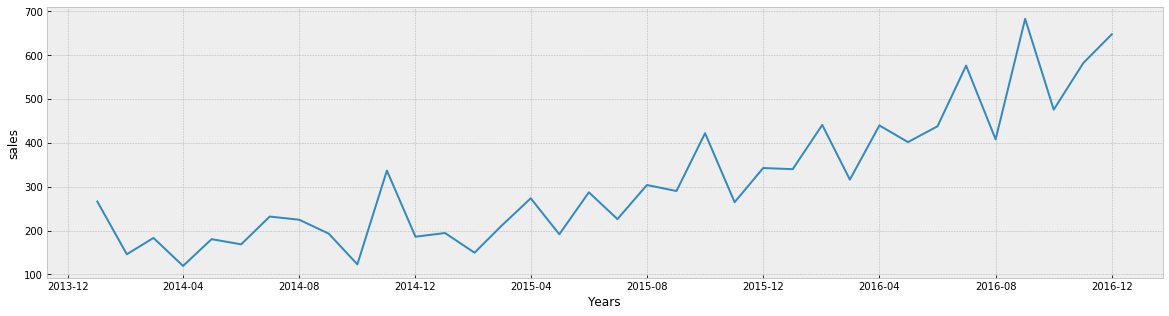

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(shampoo_ts)
plt.xlabel('Years')
plt.ylabel('sales')

In [41]:
shampoo_ts.rolling(window=12).mean()

2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01           NaN
2014-08-01           NaN
2014-09-01           NaN
2014-10-01           NaN
2014-11-01           NaN
2014-12-01    196.458333
2015-01-01    190.483333
2015-02-01    190.783333
2015-03-01    193.033333
2015-04-01    205.866667
2015-05-01    206.791667
2015-06-01    216.666667
2015-07-01    216.183333
2015-08-01    222.775000
2015-09-01    230.866667
2015-10-01    255.758333
2015-11-01    249.758333
2015-12-01    262.791667
2016-01-01    274.908333
2016-02-01    299.150000
2016-03-01    307.966667
2016-04-01    321.800000
2016-05-01    339.291667
2016-06-01    351.825000
2016-07-01    380.950000
2016-08-01    389.616667
2016-09-01    422.291667
2016-10-01    426.766667
2016-11-01    453.166667
2016-12-01    478.550000
Freq: MS, Name: sales, dtype: float64

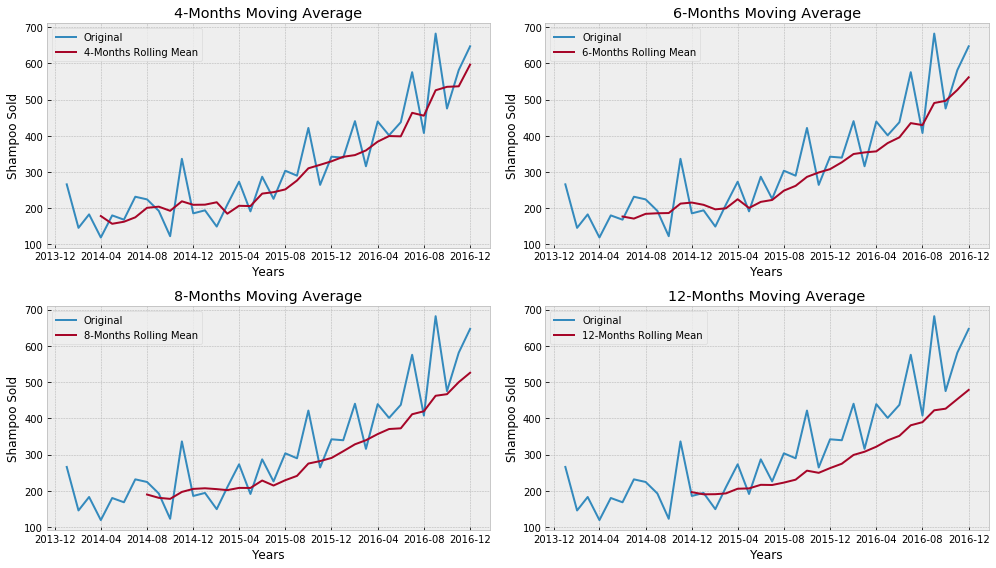

In [42]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(shampoo_ts.index, shampoo_ts, label='Original')
axes[0][0].plot(shampoo_ts.index, shampoo_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Shampoo Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(shampoo_ts.index, shampoo_ts, label='Original')
axes[0][1].plot(shampoo_ts.index, shampoo_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Shampoo Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(shampoo_ts.index, shampoo_ts, label='Original')
axes[1][0].plot(shampoo_ts.index, shampoo_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Shampoo Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(shampoo_ts.index, shampoo_ts, label='Original')
axes[1][1].plot(shampoo_ts.index, shampoo_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Shampoo Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [43]:
shampoo_data.head()

,Mon,Year,sales
2014-01-01,Jan,2014,266.0
2014-02-01,Feb,2014,145.9
2014-03-01,Mar,2014,183.1
2014-04-01,Apr,2014,119.3
2014-05-01,May,2014,180.3


In [47]:
monthly_sales_data = pd.pivot_table(shampoo_data, values = "sales", columns = "Year", index = "Mon")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2014,2015,2016
Mon,,,
Jan,266.0,194.3,339.7
Feb,145.9,149.5,440.4
Mar,183.1,210.1,315.9
Apr,119.3,273.3,439.3
May,180.3,191.4,401.3
Jun,168.5,287.0,437.4
Jul,231.8,226.0,575.5
Aug,224.5,303.6,407.6
Sep,192.8,289.9,682.0


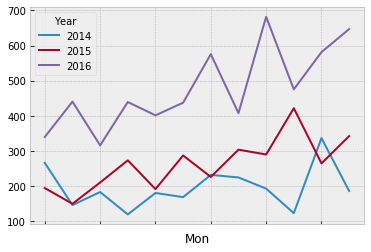

In [48]:
monthly_sales_data.plot()

In [50]:
yearly_sales_data = pd.pivot_table(shampoo_data, values = "sales", columns = "Mon", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Mon,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2014,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
2015,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,421.6,264.5,342.3
2016,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682.0,475.3,581.3,646.9


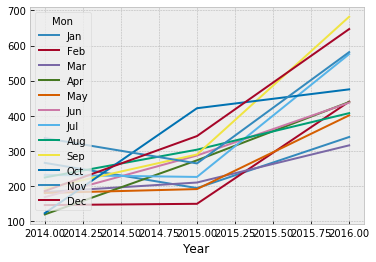

In [51]:
yearly_sales_data.plot()

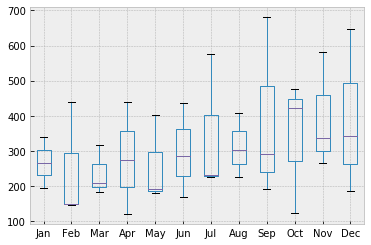

In [52]:
yearly_sales_data.boxplot()

In [53]:
decomposition = sm.tsa.seasonal_decompose(shampoo_ts, model='multiplicative',two_sided=False, extrapolate_trend=4)

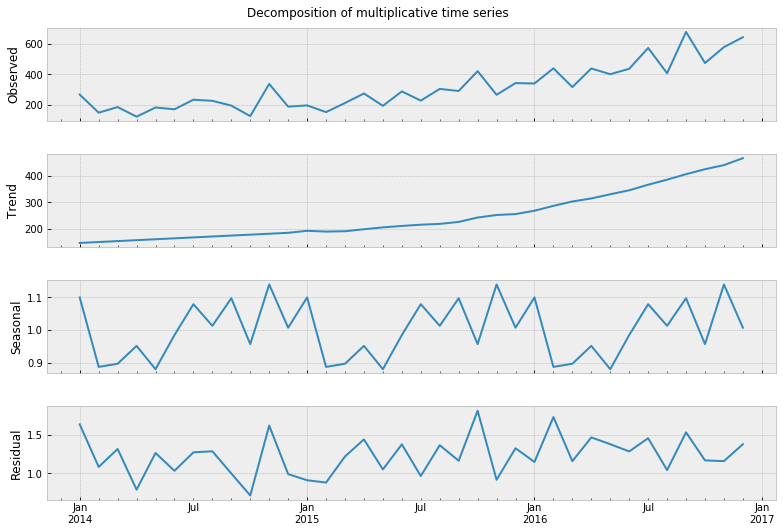

In [54]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [55]:
decomp_output = pd.DataFrame(pd.concat([decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [56]:
decomp_output.columns = ['Trend', 'Seasonal', 'Irregular']

In [57]:
decomp_output

,Trend,Seasonal,Irregular
2014-01-01,148.011667,1.100066,1.633680
2014-02-01,151.465000,0.888130,1.084592
2014-03-01,154.918333,0.897747,1.316532
2014-04-01,158.371667,0.952228,0.791083
2014-05-01,161.825000,0.881104,1.264512
2014-06-01,165.278333,0.985269,1.034735
2014-07-01,168.731667,1.079442,1.272675
2014-08-01,172.185000,1.013482,1.286485
2014-09-01,175.638333,1.097585,1.000114
2014-10-01,179.091667,0.957615,0.716615


### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [58]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [60]:
adfuller(shampoo_ts)

(3.0601420836411806,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [61]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(shampoo_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [63]:
shampoo_ts_log = np.log10(shampoo_ts)

In [64]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(shampoo_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.798463
p-value                         0.998346
#lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [66]:
shampoo_ts.head()

2014-01-01    266.0
2014-02-01    145.9
2014-03-01    183.1
2014-04-01    119.3
2014-05-01    180.3
Freq: MS, Name: sales, dtype: float64

In [67]:
shampoo_ts.diff(1).head()

2014-01-01      NaN
2014-02-01   -120.1
2014-03-01     37.2
2014-04-01    -63.8
2014-05-01     61.0
Freq: MS, Name: sales, dtype: float64

In [69]:
shampoo_ts_diff1 = shampoo_ts.diff(1)
shampoo_ts_diff1.dropna(inplace=True)

In [70]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(shampoo_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


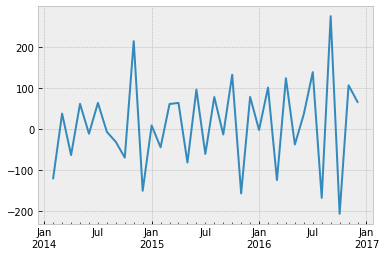

In [71]:
shampoo_ts_diff1.plot()

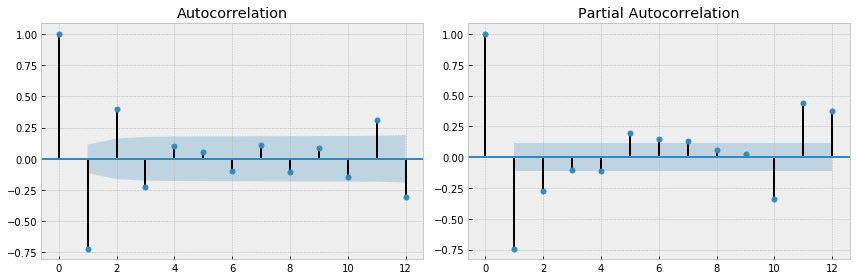

In [72]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(shampoo_ts_diff1, lags=12, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(shampoo_ts_diff1, lags=12, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [73]:
sm.tsa.statespace.SARIMAX?

In [74]:
model = sm.tsa.statespace.SARIMAX(shampoo_ts, order = (2,1,1), seasonal_order= (0,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [75]:
results = model.fit()

In [76]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  sales   No. Observations:                   36
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -188.521
Date:                Fri, 30 Nov 2018   AIC                            385.042
Time:                        15:08:03   BIC                            391.028
Sample:                    01-01-2014   HQIC                           387.056
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8522      0.610     -1.396      0.163      -2.049       0.344
ar.L2         -0.2136      0.456     -0.468      0.639      -1.107       0.680
ma.L1         -0.0758      0.666     -0.114      0.9

In [83]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 4)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [84]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [85]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [86]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(shampoo_ts,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 2)x(1, 1, 0, 12)12 model - AIC:278.0758481614132


In [114]:
best_model1 = sm.tsa.statespace.SARIMAX(shampoo_ts,
                                      order=(0, 1, 2),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results1 = best_model1.fit()

In [119]:
best_model = sm.tsa.statespace.SARIMAX(shampoo_ts,
                                      order=(2, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [120]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                           Statespace Model Results                           
Dep. Variable:                  sales   No. Observations:                   36
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -199.556
Date:                Fri, 30 Nov 2018   AIC                            407.112
Time:                        15:29:33   BIC                            413.334
Sample:                    01-01-2014   HQIC                           409.260
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6660      0.167     -9.966      0.000      -1.994      -1.338
ar.L2         -0.7467      0.153     -4.882      0.000      -1.046      -0.447
ma.L1          0.9998     48.131      0.021      0.9

In [100]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2016-01-01'), full_results=True)

In [103]:
forecast = pred_dynamic.predicted_mean

In [104]:
actual = shampoo_ts['2016-01-01':]

In [105]:
print(forecast)
print(actual)

2016-01-01    300.798159
2016-02-01    323.513803
2016-03-01    387.598896
2016-04-01    378.723366
2016-05-01    385.373362
2016-06-01    387.917501
2016-07-01    453.669271
2016-08-01    436.844178
2016-09-01    555.772412
2016-10-01    473.050194
2016-11-01    616.971744
2016-12-01    524.274920
Freq: MS, dtype: float64
2016-01-01    339.7
2016-02-01    440.4
2016-03-01    315.9
2016-04-01    439.3
2016-05-01    401.3
2016-06-01    437.4
2016-07-01    575.5
2016-08-01    407.6
2016-09-01    682.0
2016-10-01    475.3
2016-11-01    581.3
2016-12-01    646.9
Freq: MS, Name: sales, dtype: float64


In [106]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [107]:
print('The Mean Absolute percentage error of our forecast for last years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last years is 0.1351


In [115]:
print(best_results1.summary().tables[0])
print(best_results1.summary().tables[1])

                           Statespace Model Results                           
Dep. Variable:                  sales   No. Observations:                   36
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -196.730
Date:                Fri, 30 Nov 2018   AIC                            399.461
Time:                        15:28:17   BIC                            404.127
Sample:                    01-01-2014   HQIC                           401.072
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3002      2.420     -0.537      0.591      -6.042       3.442
ma.L2          0.9940      3.683      0.270      0.787      -6.225       8.213
sigma2      3748.6601   1.37e+04      0.274      0.7

In [116]:
pred_dynamic = best_results1.get_prediction(start=pd.to_datetime('2016-01-01'), full_results=True)

In [117]:
forecast1 = pred_dynamic.predicted_mean

In [118]:
forecast1

2016-01-01    385.749238
2016-02-01    372.513424
2016-03-01    312.526204
2016-04-01    374.716180
2016-05-01    361.155905
2016-06-01    410.743143
2016-07-01    441.293306
2016-08-01    431.124505
2016-09-01    563.150002
2016-10-01    509.359299
2016-11-01    630.476809
2016-12-01    611.462953
Freq: MS, dtype: float64

In [123]:
pred_forecast = best_results.forecast(steps=12)

In [124]:
pred_forecast

2017-01-01    578.041893
2017-02-01    643.779694
2017-03-01    585.673173
2017-04-01    633.395600
2017-05-01    597.275303
2017-06-01    621.819644
2017-07-01    607.898172
2017-08-01    612.765102
2017-09-01    615.051478
2017-10-01    607.608283
2017-11-01    618.301697
2017-12-01    606.043791
Freq: MS, dtype: float64